In [2]:
# IMPORTANT: RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES,
# THEN FEEL FREE TO DELETE THIS CELL.
# NOTE: THIS NOTEBOOK ENVIRONMENT DIFFERS FROM KAGGLE'S PYTHON
# ENVIRONMENT SO THERE MAY BE MISSING LIBRARIES USED BY YOUR
# NOTEBOOK.
#import kagglehub
#mahmoudelhemaly_students_grading_dataset_path = kagglehub.dataset_download('mahmoudelhemaly/students-grading-dataset')
#
#print('Data source import complete.')

# About Dataset

  ## Student Performance & Behavior Dataset
 
-This dataset is real data of 5,000 records collected from a private learning provider. The dataset includes key attributes necessary for exploring patterns, correlations, and insights related to academic performance

### THis is the columns in dataSet: 
Student_ID: Unique identifier for each student.                                                     
First_Name: Student’s first name.                                                                   
Last_Name: Student’s last name.                                                                     
Email: Contact email (can be anonymized).                                                           
Gender: Male, Female, Other.                                                                     
Age: The age of the student.                                                                     
Department: Student's department (e.g., CS, Engineering, Business).                                 
Attendance (%): Attendance percentage (0-100%).                                                     
Midterm_Score: Midterm exam score (out of 100).                                                     
Final_Score: Final exam score (out of 100).                                                         
Assignments_Avg: Average score of all assignments (out of 100).                                     
Quizzes_Avg: Average quiz scores (out of 100).                                                     
Participation_Score: Score based on class participation (0-10).                                  
Projects_Score: Project evaluation score (out of 100).                                              
Total_Score: Weighted sum of all grades.                                                     
Grade: Letter grade (A, B, C, D, F).                                                             
Study_Hours_per_Week: Average study hours per week.                                                 
Extracurricular_Activities: Whether the student participates in extracurriculars (Yes/No).          
Internet_Access_at_Home: Does the student have access to the internet at home? (Yes/No).           
Parent_Education_Level: Highest education level of parents (None, High School, Bachelor's, Master's, PhD).                                                                                  
Family_Income_Level: Low, Medium, High.                                                             
Stress_Level (1-10): Self-reported stress level (1: Low, 10: High).                                 
Sleep_Hours_per_Night: Average hours of sleep per night.                                             

# Import libraries for use in analysis and visualization 


In [3]:
import pandas as pd # Required for data manipulation and analysis
import numpy as np # Required for mathematical operations
import matplotlib.pyplot as plt # Required for data visualization
import seaborn as sns # Required for statistical data visualization and exploration
import plotly.express as px # Required for interactive data visualization using plotly.express library
import plotly.graph_objects as go # Required for interactive data visualization using plotly.graph_objects library 
from sklearn.preprocessing import LabelEncoder # Required for label encoding categorical variables
from sklearn.feature_selection import mutual_info_regression # Required for mutual information analysis
from sklearn.model_selection import train_test_split# Required for splitting the dataset into training and testing sets
from sklearn.linear_model import LinearRegression # Required for linear regression analysis
from sklearn.tree import DecisionTreeRegressor # Required for decision tree regression
from sklearn.ensemble import RandomForestRegressor # Required for random forest regression
from sklearn.metrics import mean_squared_error, r2_score # Required for evaluating regression models
#import tensorflow as tf
#from tensorflow.keras.models import Sequential
#from tensorflow.keras.layers import Dense, Dropout
from scipy.stats import ttest_ind
from scipy import stats

## load the data 

In [4]:
data = pd.read_csv('./Students_Grading_Dataset.csv' , index_col='Student_ID'  )
data.head() # Display the first 5 rows of the dataset


First_Name Last_Name                    Email  Gender  Age  \
Student_ID                                                              
S1000            Omar  Williams  student0@university.com  Female   22   
S1001           Maria     Brown  student1@university.com    Male   18   
S1002           Ahmed     Jones  student2@university.com    Male   24   
S1003            Omar  Williams  student3@university.com  Female   24   
S1004            John     Smith  student4@university.com  Female   23   

             Department  Attendance (%)  Midterm_Score  Final_Score  \
Student_ID                                                            
S1000       Engineering           52.29          55.03        57.82   
S1001       Engineering           97.27          97.23        45.80   
S1002          Business           57.19          67.05        93.68   
S1003       Mathematics           95.15          47.79        80.63   
S1004                CS           54.18          46.59        78.89   

            Assignments_Avg  ...  Projects_Score  Total_Score  Grade  \
Student_ID                   ...                                       
S1000                 84.22  ...           85.90        56.09      F   
S1001                   NaN  ...           55.65        50.64      A   
S1002                 67.70  ...           73.79        70.30      D   
S1003                 66.06  ...           92.12        61.63      A   
S1004                 96.85  ...           68.42        66.13      F   

            Study_Hours_per_Week Extracurricular_Activities  \
Student_ID                                                    
S1000                        6.2                         No   
S1001                       19.0                         No   
S1002                       20.7                         No   
S1003                       24.8                        Yes   
S1004                       15.4                        Yes   

            Internet_Access_at_Home Parent_Education_Level  \
Student_ID                                                   
S1000                           Yes            High School   
S1001                           Yes                    NaN   
S1002                           Yes               Master's   
S1003                           Yes            High School   
S1004                           Yes            High School   

           Family_Income_Level Stress_Level (1-10) Sleep_Hours_per_Night  
Student_ID                                                                
S1000                   Medium                   5                   4.7  
S1001                   Medium                   4                   9.0  
S1002                      Low                   6                   6.2  
S1003                     High                   3                   6.7  
S1004                     High                   2                   7.1  

[5 rows x 22 columns]

# Data Cleaning and Peproccessing 

In [5]:
data.tail() # Display the last 5 rows of the dataset


First_Name Last_Name                       Email  Gender  Age  \
Student_ID                                                                 
S5995           Ahmed     Jones  student4995@university.com    Male   19   
S5996            Emma     Brown  student4996@university.com    Male   19   
S5997            John     Brown  student4997@university.com  Female   24   
S5998            Sara     Davis  student4998@university.com    Male   23   
S5999           Maria     Brown  student4999@university.com  Female   21   

             Department  Attendance (%)  Midterm_Score  Final_Score  \
Student_ID                                                            
S5995          Business             NaN          82.15        60.33   
S5996          Business           65.11          86.31        49.80   
S5997                CS           87.54          63.55        64.21   
S5998                CS           92.56          79.79        94.28   
S5999       Engineering           83.92          83.24        53.47   

            Assignments_Avg  ...  Projects_Score  Total_Score  Grade  \
Student_ID                   ...                                       
S5995                 80.09  ...           58.42        85.21      D   
S5996                   NaN  ...           60.87        95.96      C   
S5997                 94.28  ...           82.65        54.25      A   
S5998                 81.20  ...           94.29        55.84      A   
S5999                 51.76  ...           69.25        77.86      F   

            Study_Hours_per_Week Extracurricular_Activities  \
Student_ID                                                    
S5995                       25.5                         No   
S5996                        5.0                         No   
S5997                       24.8                        Yes   
S5998                       16.1                        Yes   
S5999                       29.2                         No   

            Internet_Access_at_Home Parent_Education_Level  \
Student_ID                                                   
S5995                           Yes            High School   
S5996                           Yes                    NaN   
S5997                            No            High School   
S5998                           Yes             Bachelor's   
S5999                           Yes                    PhD   

           Family_Income_Level Stress_Level (1-10) Sleep_Hours_per_Night  
Student_ID                                                                
S5995                      Low                  10                   8.3  
S5996                   Medium                   4                   4.0  
S5997                   Medium                   4                   6.3  
S5998                      Low                   1                   8.4  
S5999                      Low                   2                   6.1  

[5 rows x 22 columns]

In [6]:
data.shape # Display the number of rows and columns in the dataset

(5000, 22)

In [7]:
data.info() # Display information about the dataset including column names, data types, and number of non-null values

<class 'pandas.core.frame.DataFrame'>
Index: 5000 entries, S1000 to S5999
Data columns (total 22 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   First_Name                  5000 non-null   object 
 1   Last_Name                   5000 non-null   object 
 2   Email                       5000 non-null   object 
 3   Gender                      5000 non-null   object 
 4   Age                         5000 non-null   int64  
 5   Department                  5000 non-null   object 
 6   Attendance (%)              4484 non-null   float64
 7   Midterm_Score               5000 non-null   float64
 8   Final_Score                 5000 non-null   float64
 9   Assignments_Avg             4483 non-null   float64
 10  Quizzes_Avg                 5000 non-null   float64
 11  Participation_Score         5000 non-null   float64
 12  Projects_Score              5000 non-null   float64
 13  Total_Score                 5000 

In [8]:
data.describe() # Display statistical summary of the dataset including count, mean, standard deviation, minimum, and maximum values

Age  Attendance (%)  Midterm_Score  Final_Score  \
count  5000.000000     4484.000000    5000.000000  5000.000000   
mean     21.048400       75.431409      70.326844    69.640788   
std       1.989786       14.372446      17.213209    17.238744   
min      18.000000       50.010000      40.000000    40.000000   
25%      19.000000       63.265000      55.457500    54.667500   
50%      21.000000       75.725000      70.510000    69.735000   
75%      23.000000       87.472500      84.970000    84.500000   
max      24.000000      100.000000      99.980000    99.980000   

       Assignments_Avg  Quizzes_Avg  Participation_Score  Projects_Score  \
count      4483.000000  5000.000000          5000.000000     5000.000000   
mean         74.798673    74.910728             4.980024       74.924860   
std          14.411799    14.504281             2.890136       14.423415   
min          50.000000    50.030000             0.000000       50.010000   
25%          62.090000    62.490000             2.440000       62.320000   
50%          74.810000    74.695000             4.955000       74.980000   
75%          86.970000    87.630000             7.500000       87.367500   
max          99.980000    99.960000            10.000000      100.000000   

       Total_Score  Study_Hours_per_Week  Stress_Level (1-10)  \
count  5000.000000           5000.000000           5000.00000   
mean     75.121804             17.658860              5.48080   
std      14.399941              7.275864              2.86155   
min      50.020000              5.000000              1.00000   
25%      62.835000             11.400000              3.00000   
50%      75.395000             17.500000              5.00000   
75%      87.652500             24.100000              8.00000   
max      99.990000             30.000000             10.00000   

       Sleep_Hours_per_Night  
count            5000.000000  
mean                6.488140  
std                 1.452283  
min                 4.000000  
25%                 5.200000  
50%                 6.500000  
75%                 7.700000  
max                 9.000000

## Check on missing values in the dataset

In [9]:
data.isnull().sum() # Display the number of missing values in each column of the dataset 

First_Name                       0
Last_Name                        0
Email                            0
Gender                           0
Age                              0
Department                       0
Attendance (%)                 516
Midterm_Score                    0
Final_Score                      0
Assignments_Avg                517
Quizzes_Avg                      0
Participation_Score              0
Projects_Score                   0
Total_Score                      0
Grade                            0
Study_Hours_per_Week             0
Extracurricular_Activities       0
Internet_Access_at_Home          0
Parent_Education_Level        1794
Family_Income_Level              0
Stress_Level (1-10)              0
Sleep_Hours_per_Night            0
dtype: int64

## Handing missing values in the student dataset
 we have a missing values in the 'Attendance (%)' = 516 'Assignments_Avg'=517 and 'Parent_Education_Level' = 1794


In [10]:
data_clean = data
data_clean['Assignments_Avg'] = data['Assignments_Avg'].fillna(data['Assignments_Avg'].median())

data_clean['Parent_Education_Level'] = data['Parent_Education_Level'].fillna('None')

data_clean['Attendance (%)'] = data['Attendance (%)'].fillna(data['Attendance (%)'].mean())

In [11]:
data_clean.isnull().sum() # Display the number of missing values in each column of the dataset

First_Name                    0
Last_Name                     0
Email                         0
Gender                        0
Age                           0
Department                    0
Attendance (%)                0
Midterm_Score                 0
Final_Score                   0
Assignments_Avg               0
Quizzes_Avg                   0
Participation_Score           0
Projects_Score                0
Total_Score                   0
Grade                         0
Study_Hours_per_Week          0
Extracurricular_Activities    0
Internet_Access_at_Home       0
Parent_Education_Level        0
Family_Income_Level           0
Stress_Level (1-10)           0
Sleep_Hours_per_Night         0
dtype: int64

## Data Quality:
Check on duplicated values in the dataset

In [12]:
print(data.duplicated().sum()) # Display the number of duplicated rows in the dataset

0


In [13]:
data_clean = data.drop_duplicates()
print(data_clean.duplicated().sum())

0


No duplicated values found in the dataset.

## Delete unnecessary columns from student dataSet

Columns like First_Name, Last_Name, and Email are not useful for analysis.

In [14]:
data_clean = data.drop(columns=["First_Name", "Last_Name", "Email"])  # Drop the columns that are not needed


In [15]:
data_clean['Department'] = data['Department'].astype('category')
data_clean['Gender'] = data['Gender'].astype('category')



In [16]:
data_clean.groupby('Parent_Education_Level')['Final_Score'].mean() # Group the data by Parent_Education_Level and calculate the mean of Final_Score

Parent_Education_Level
Bachelor's     69.141691
High School    69.817349
Master's       69.578090
None           69.990379
PhD            69.257207
Name: Final_Score, dtype: float64

In [17]:
data_clean.drop(columns=['Parent_Education_Level'], inplace=True)

In [18]:
data_clean.info() #check again for data info

<class 'pandas.core.frame.DataFrame'>
Index: 5000 entries, S1000 to S5999
Data columns (total 18 columns):
 #   Column                      Non-Null Count  Dtype   
---  ------                      --------------  -----   
 0   Gender                      5000 non-null   category
 1   Age                         5000 non-null   int64   
 2   Department                  5000 non-null   category
 3   Attendance (%)              5000 non-null   float64 
 4   Midterm_Score               5000 non-null   float64 
 5   Final_Score                 5000 non-null   float64 
 6   Assignments_Avg             5000 non-null   float64 
 7   Quizzes_Avg                 5000 non-null   float64 
 8   Participation_Score         5000 non-null   float64 
 9   Projects_Score              5000 non-null   float64 
 10  Total_Score                 5000 non-null   float64 
 11  Grade                       5000 non-null   object  
 12  Study_Hours_per_Week        5000 non-null   float64 
 13  Extracurricular_Ac

In [19]:
data_clean.shape

(5000, 18)

## check on outliers values 

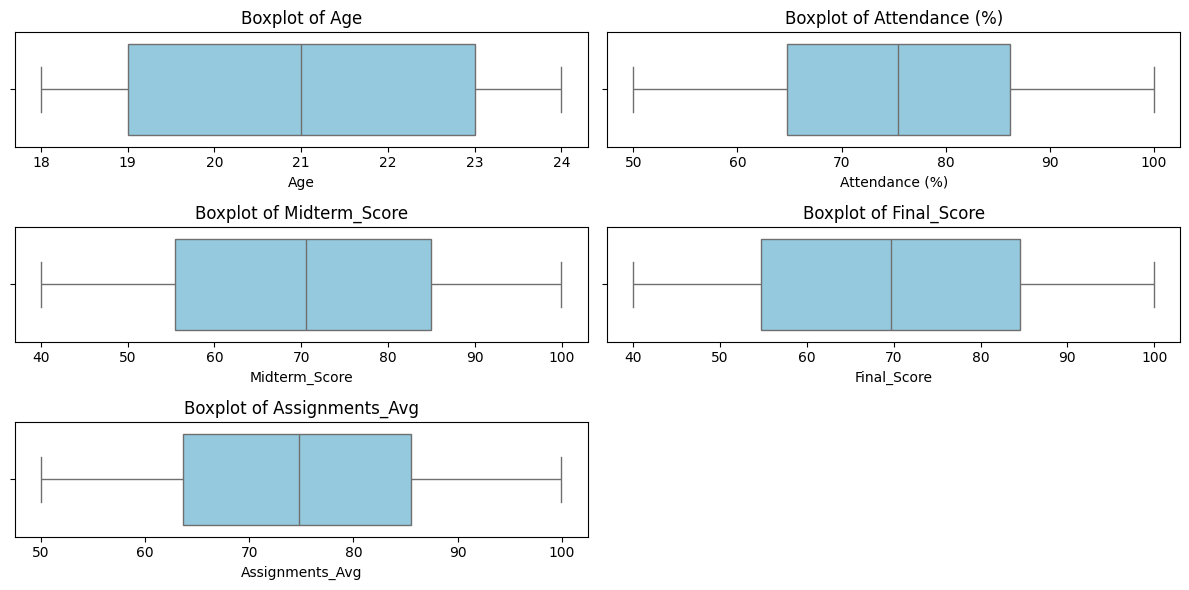

In [20]:
numerical_cols = ["Age", "Attendance (%)", "Midterm_Score", "Final_Score", "Assignments_Avg"]
plt.figure(figsize=(12, 6))

# Boxplot for outlier detection
for i, col in enumerate(numerical_cols, 1):
    plt.subplot(3, 2, i)
    sns.boxplot(x=data_clean[col], color="skyblue")
    plt.title(f"Boxplot of {col}")

plt.tight_layout()
plt.show()

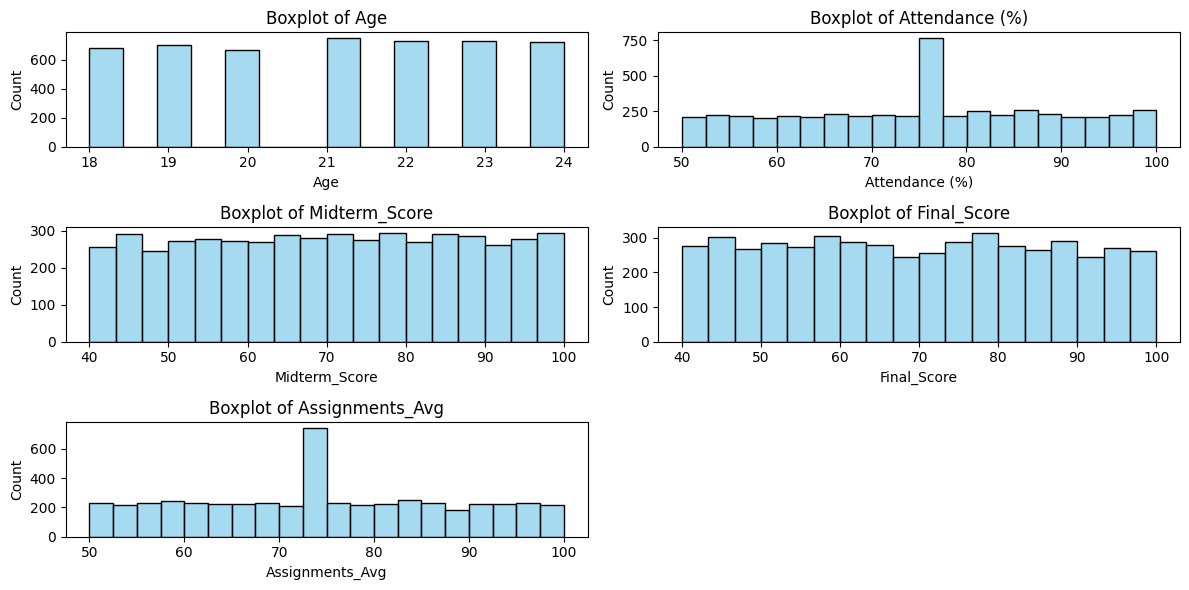

In [21]:
numerical_cols = ["Age", "Attendance (%)", "Midterm_Score", "Final_Score", "Assignments_Avg"]
plt.figure(figsize=(12, 6))

# Boxplot for outlier detection
for i, col in enumerate(numerical_cols, 1):
    plt.subplot(3, 2, i)
    sns.histplot(x=data_clean[col], color="skyblue")
    plt.title(f"Boxplot of {col}")

plt.tight_layout()
plt.show()

no outlier in the numircal distribution of data from visualization tools

In [22]:
numeric_df = data_clean.select_dtypes(include='number')

Q1 = numeric_df.quantile(0.25)
Q3 = numeric_df.quantile(0.75)
IQR = Q3 - Q1

count_out = numeric_df[(numeric_df < (Q1 - 1.5 * IQR)) | (numeric_df > (Q3 + 1.5 * IQR))].count()
df_count_out = pd.DataFrame(count_out, columns=['count_out'])

print(df_count_out)

                       count_out
Age                            0
Attendance (%)                 0
Midterm_Score                  0
Final_Score                    0
Assignments_Avg                0
Quizzes_Avg                    0
Participation_Score            0
Projects_Score                 0
Total_Score                    0
Study_Hours_per_Week           0
Stress_Level (1-10)            0
Sleep_Hours_per_Night          0


## encoding necessary columns for machine learning model
### Machine learning models and numerical analysis require categorical data to be converted into numbers.

🛠 Solution:
One-Hot Encoding for non-ordinal categories (e.g., Gender, Department).
Label Encoding for ordinal categories (e.g., Parent_Education_Level).
python
Copy
Edit


use a label encoder to encode the 'family_income_level' column and "grade" column  into numerical values
 as must be ordered 

In [23]:
le = LabelEncoder()
data_clean["Family_Income_Level"] = le.fit_transform(data_clean["Family_Income_Level"])

In [24]:
data_clean["Grade"] = le.fit_transform(data_clean["Grade"])

use the One-Hot Encoding to encode the 'Extracurricular_Activities ' column and 'Internet_Access_at_Home ' column  and  'Gender' column into numerical values

In [25]:
data_clean = pd.get_dummies(data_clean, columns=["Gender", "Department", "Extracurricular_Activities","Internet_Access_at_Home"], drop_first=True)


## Finally  the data is redy for analysis purposes

check the data info after encoding 

In [26]:
data_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5000 entries, S1000 to S5999
Data columns (total 20 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Age                             5000 non-null   int64  
 1   Attendance (%)                  5000 non-null   float64
 2   Midterm_Score                   5000 non-null   float64
 3   Final_Score                     5000 non-null   float64
 4   Assignments_Avg                 5000 non-null   float64
 5   Quizzes_Avg                     5000 non-null   float64
 6   Participation_Score             5000 non-null   float64
 7   Projects_Score                  5000 non-null   float64
 8   Total_Score                     5000 non-null   float64
 9   Grade                           5000 non-null   int64  
 10  Study_Hours_per_Week            5000 non-null   float64
 11  Family_Income_Level             5000 non-null   int64  
 12  Stress_Level (1-10)             50

In [27]:
data_clean.head()

Age  Attendance (%)  Midterm_Score  Final_Score  Assignments_Avg  \
Student_ID                                                                     
S1000        22           52.29          55.03        57.82            84.22   
S1001        18           97.27          97.23        45.80            74.81   
S1002        24           57.19          67.05        93.68            67.70   
S1003        24           95.15          47.79        80.63            66.06   
S1004        23           54.18          46.59        78.89            96.85   

            Quizzes_Avg  Participation_Score  Projects_Score  Total_Score  \
Student_ID                                                                  
S1000             74.06                 3.99           85.90        56.09   
S1001             94.24                 8.32           55.65        50.64   
S1002             85.70                 5.05           73.79        70.30   
S1003             93.51                 6.54           92.12        61.63   
S1004             83.70                 5.97           68.42        66.13   

            Grade  Study_Hours_per_Week  Family_Income_Level  \
Student_ID                                                     
S1000           4                   6.2                    2   
S1001           0                  19.0                    2   
S1002           3                  20.7                    1   
S1003           0                  24.8                    0   
S1004           4                  15.4                    0   

            Stress_Level (1-10)  Sleep_Hours_per_Night  Gender_Male  \
Student_ID                                                            
S1000                         5                    4.7        False   
S1001                         4                    9.0         True   
S1002                         6                    6.2         True   
S1003                         3                    6.7        False   
S1004                         2                    7.1        False   

            Department_CS  Department_Engineering  Department_Mathematics  \
Student_ID                                                                  
S1000               False                    True                   False   
S1001               False                    True                   False   
S1002               False                   False                   False   
S1003               False                   False                    True   
S1004                True                   False                   False   

            Extracurricular_Activities_Yes  Internet_Access_at_Home_Yes  
Student_ID                                                               
S1000                                False                         True  
S1001                                False                         True  
S1002                                False                         True  
S1003                                 True                         True  
S1004                                 True                         True

# Exploratory Data analysis (EDA)

In [28]:
# Summary statistics
data_clean.describe()


Age  Attendance (%)  Midterm_Score  Final_Score  \
count  5000.000000     5000.000000    5000.000000  5000.000000   
mean     21.048400       75.431409      70.326844    69.640788   
std       1.989786       13.610481      17.213209    17.238744   
min      18.000000       50.010000      40.000000    40.000000   
25%      19.000000       64.737500      55.457500    54.667500   
50%      21.000000       75.431409      70.510000    69.735000   
75%      23.000000       86.182500      84.970000    84.500000   
max      24.000000      100.000000      99.980000    99.980000   

       Assignments_Avg  Quizzes_Avg  Participation_Score  Projects_Score  \
count      5000.000000  5000.000000          5000.000000     5000.000000   
mean         74.799844    74.910728             4.980024       74.924860   
std          13.646227    14.504281             2.890136       14.423415   
min          50.000000    50.030000             0.000000       50.010000   
25%          63.687500    62.490000             2.440000       62.320000   
50%          74.810000    74.695000             4.955000       74.980000   
75%          85.570000    87.630000             7.500000       87.367500   
max          99.980000    99.960000            10.000000      100.000000   

       Total_Score       Grade  Study_Hours_per_Week  Family_Income_Level  \
count  5000.000000  5000.00000           5000.000000          5000.000000   
mean     75.121804     1.72180             17.658860             1.185800   
std      14.399941     1.47229              7.275864             0.754316   
min      50.020000     0.00000              5.000000             0.000000   
25%      62.835000     0.00000             11.400000             1.000000   
50%      75.395000     2.00000             17.500000             1.000000   
75%      87.652500     3.00000             24.100000             2.000000   
max      99.990000     4.00000             30.000000             2.000000   

       Stress_Level (1-10)  Sleep_Hours_per_Night  
count           5000.00000            5000.000000  
mean               5.48080               6.488140  
std                2.86155               1.452283  
min                1.00000               4.000000  
25%                3.00000               5.200000  
50%                5.00000               6.500000  
75%                8.00000               7.700000  
max               10.00000               9.000000

Correlation Heatmap (Finding Relationships)


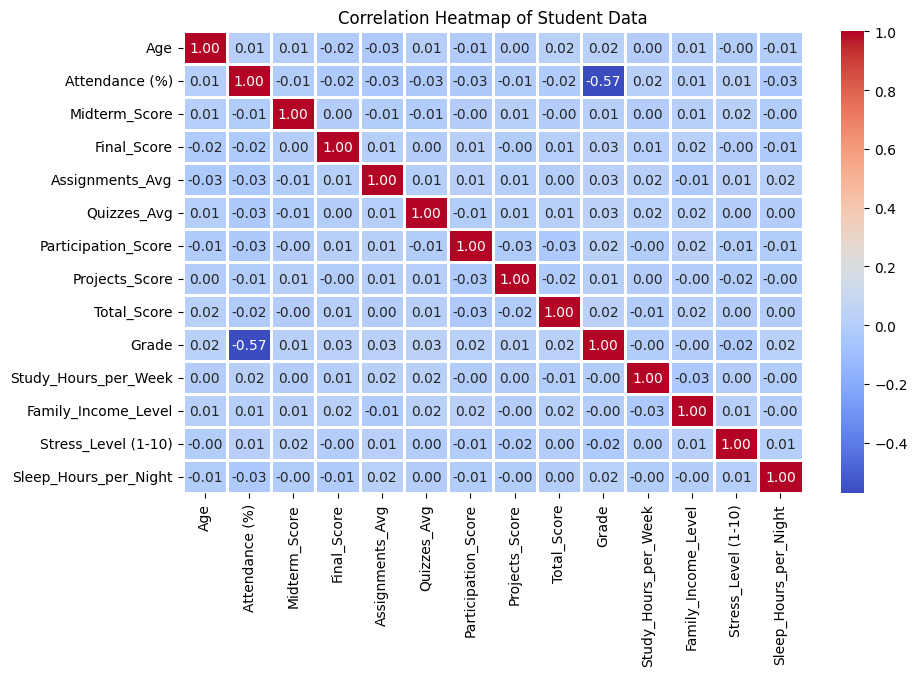

In [29]:

# Select only numeric columns
numeric_df = data_clean.select_dtypes(include=['number'])

# Compute correlation matrix
plt.figure(figsize=(10,6))
sns.heatmap(numeric_df.corr(), annot=True, cmap="coolwarm", fmt=".2f", linewidths=1)
plt.title("Correlation Heatmap of Student Data")
plt.show()


Week correlation in heatmap then we show different correlation methods 

In [30]:
spearman_corr=numeric_df.corr(method='spearman')
# Use Spearman correlation

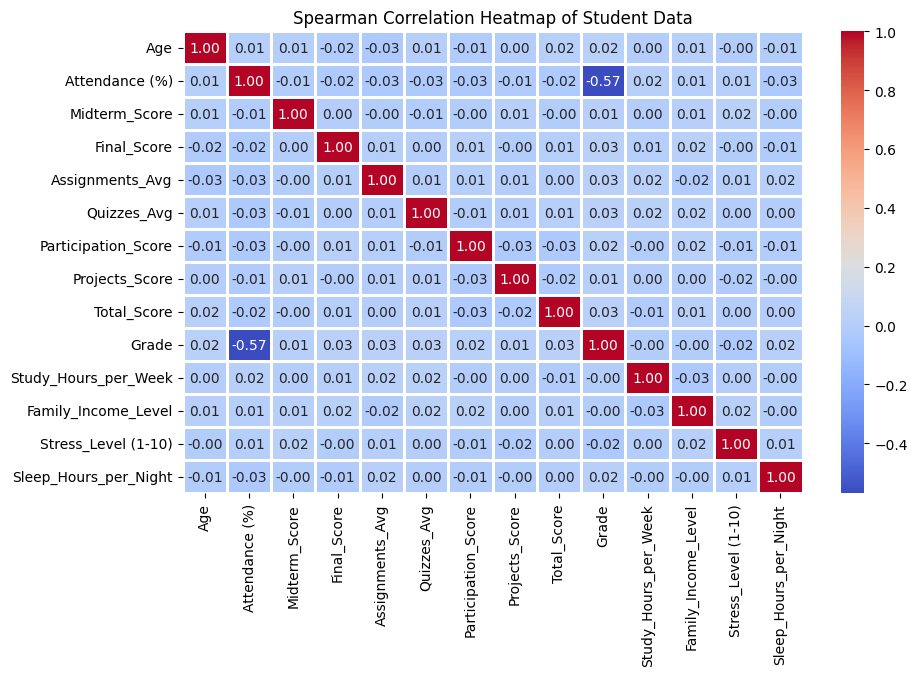

In [31]:
# Plot the heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(spearman_corr, annot=True, cmap="coolwarm", fmt=".2f", linewidths=1)

plt.title("Spearman Correlation Heatmap of Student Data")
plt.show()

In [32]:

Kendall_corr=numeric_df.corr(method='kendall')  # Use Kendall correlation


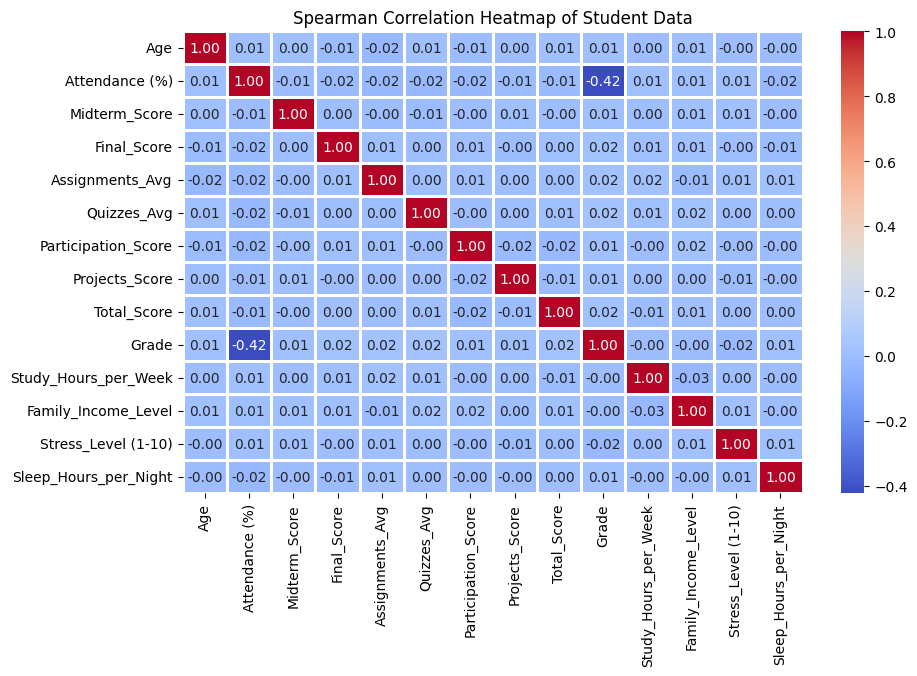

In [33]:
# Plot the heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(Kendall_corr, annot=True, cmap="coolwarm", fmt=".2f", linewidths=1)

plt.title("Spearman Correlation Heatmap of Student Data")
plt.show()

after checking the correlation heatmap we can say that the data is not linearly related                                                                   
-Helps identify strong relationships                                                                                                                    
-Most of the correlations are weak (close to 0) meaning the relationships between variables are not strong
-So accuracy will be bad

## data Visualization

Histplot
Displays the distribution of numerical columns using histograms

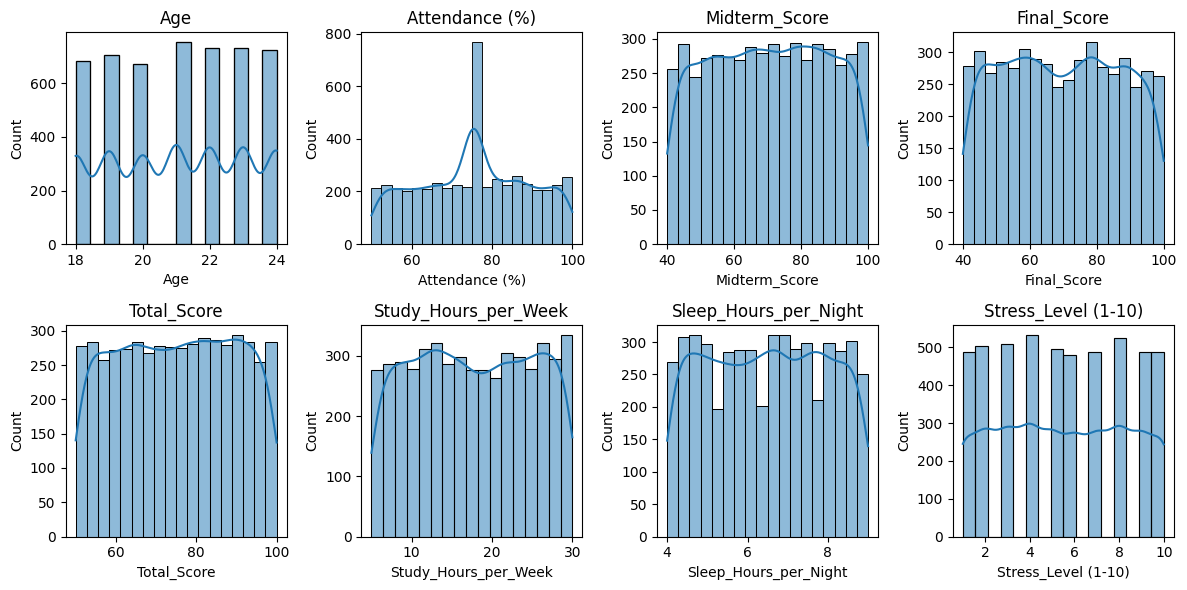

In [34]:
num_cols = ['Age', 'Attendance (%)', 'Midterm_Score', 'Final_Score', 'Total_Score', 
            'Study_Hours_per_Week', 'Sleep_Hours_per_Night', 'Stress_Level (1-10)']

plt.figure(figsize=(12, 6))
for i, col in enumerate(num_cols, 1):
    plt.subplot(2, 4, i)
    sns.histplot(data_clean[col], kde=True)
    plt.title(col)
plt.tight_layout()
plt.show()

grade distribution

C:\Users\DELL\AppData\Local\Temp\ipykernel_6164\2811521407.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=data_clean['Grade'], order=data_clean['Grade'].value_counts().index, palette="coolwarm")


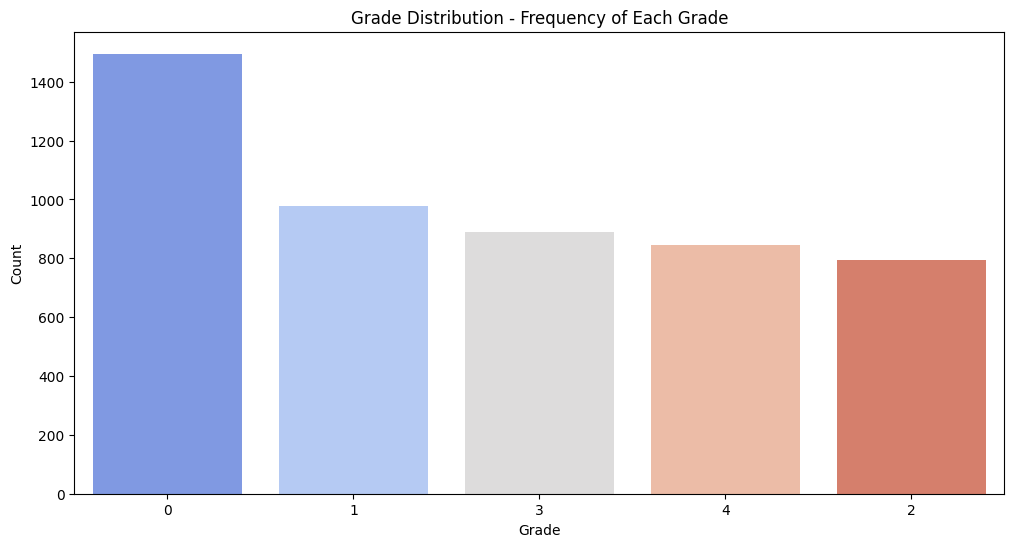

In [35]:
plt.figure(figsize=(12, 6))
sns.countplot(x=data_clean['Grade'], order=data_clean['Grade'].value_counts().index, palette="coolwarm")
plt.title("Grade Distribution - Frequency of Each Grade")
plt.xlabel("Grade")
plt.ylabel("Count")
plt.show()

Total score distribution


C:\Users\DELL\AppData\Local\Temp\ipykernel_6164\3796709042.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=data_clean['Grade'], y=data_clean['Total_Score'], palette="coolwarm",order=data_clean['Grade'].value_counts().index)


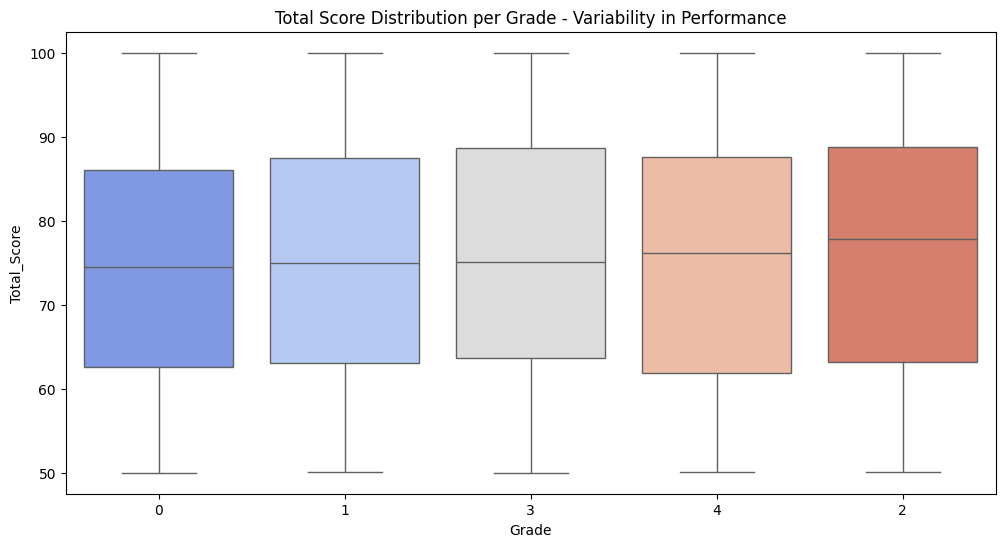

In [36]:
plt.figure(figsize=(12, 6))
sns.boxplot(x=data_clean['Grade'], y=data_clean['Total_Score'], palette="coolwarm",order=data_clean['Grade'].value_counts().index)
plt.title("Total Score Distribution per Grade - Variability in Performance")
plt.show()

Show the gender percentile

C:\Users\DELL\AppData\Local\Temp\ipykernel_6164\3636720912.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=data_clean['Gender_Male'].value_counts().index,


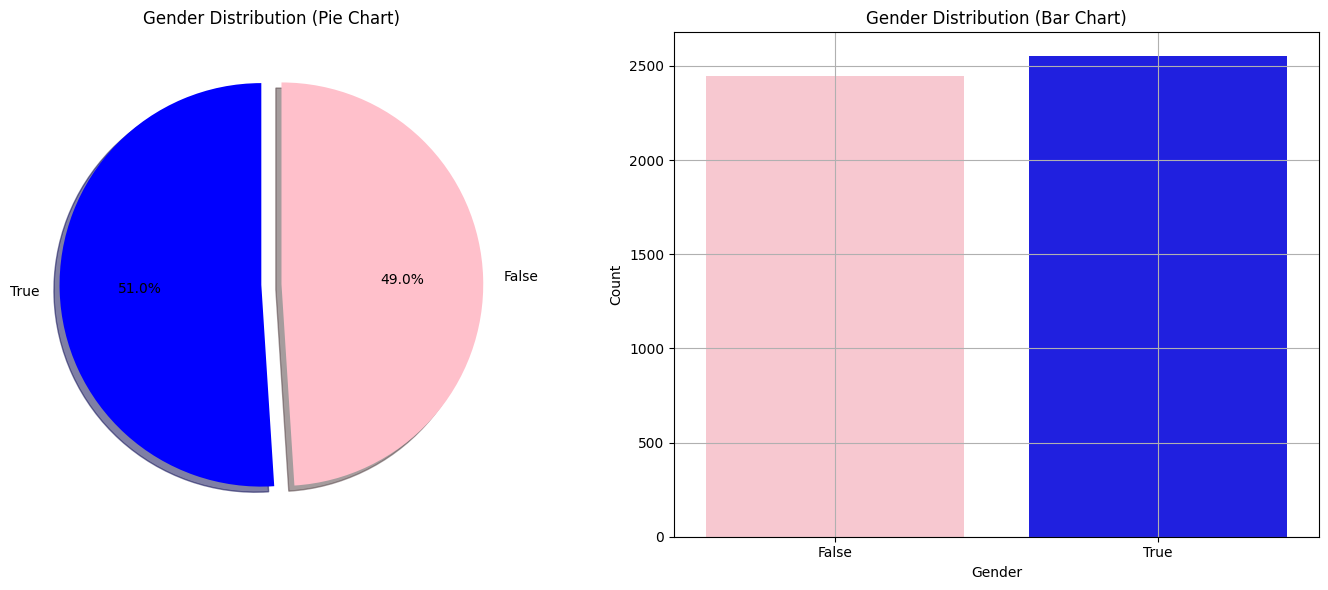

In [37]:
fig, axes = plt.subplots(1, 2, figsize=(14, 6))
# PIE CHART 
axes[0].pie(data_clean['Gender_Male'].value_counts().sort_values(ascending=False), 
            labels=data_clean['Gender_Male'].value_counts().index, 
            autopct="%.1f%%", shadow=True, colors=["blue", "pink"],
            startangle=90, explode=[0.05, 0.05]
            )
axes[0].set_title("Gender Distribution (Pie Chart)")

# BAR CHART
sns.barplot(x=data_clean['Gender_Male'].value_counts().index, 
            y=data_clean['Gender_Male'].value_counts().values, 
            ax=axes[1], palette=["pink", "blue"])
axes[1].set_title("Gender Distribution (Bar Chart)")
axes[1].set_xlabel("Gender")
axes[1].set_ylabel("Count")
plt.grid(True)
plt.tight_layout()
plt.show()


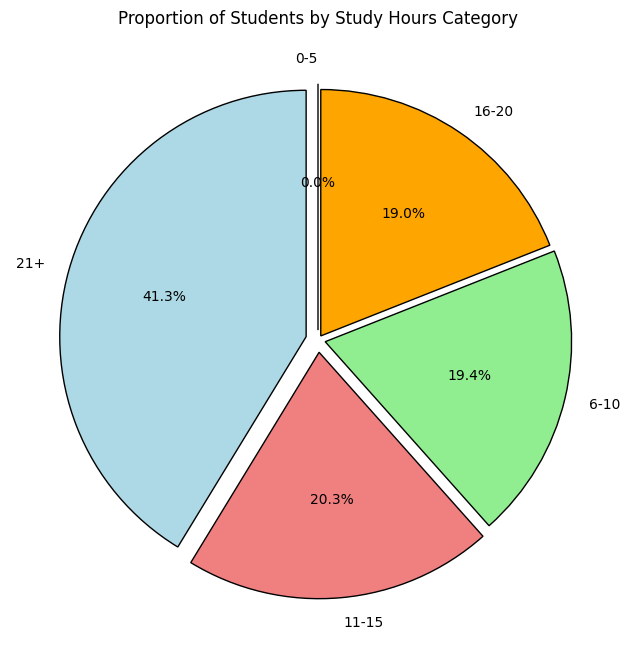

In [38]:
# Grouping students based on study hours per week
data_clean["Study_Category"] = pd.cut(data_clean["Study_Hours_per_Week"], 
                              bins=[0, 5, 10, 15, 20, np.inf], 
                              labels=["0-5", "6-10", "11-15", "16-20", "21+"],
                              include_lowest=True, right=False
                              
                              )
# Count the number of students in each category
study_counts = data_clean["Study_Category"].value_counts().sort_values(ascending=False)

# Pie Chart
plt.figure(figsize=(8, 8))
plt.pie(study_counts, labels=study_counts.index, autopct="%1.1f%%", 
        colors=["lightblue", "lightcoral", "lightgreen", "orange", "purple"], 
        startangle=90, wedgeprops={'edgecolor': 'black'},
        explode=[0.05, 0.05,0.03,0.02,0.04]
        )

plt.title("Proportion of Students by Study Hours Category")
plt.show()


show the relations between columns

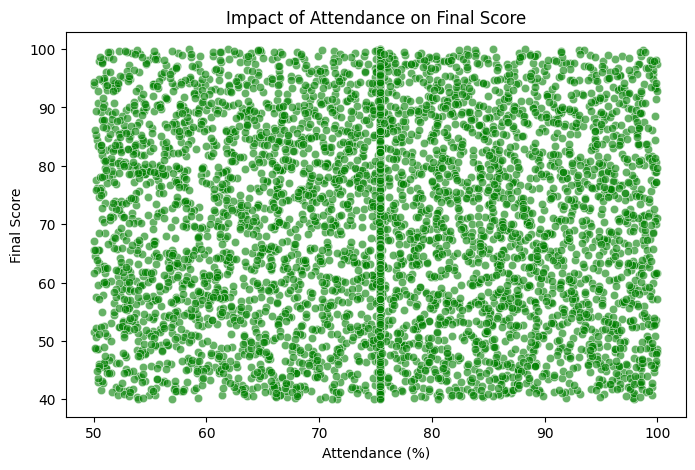

In [39]:
# Scatter plot: Attendance vs. Final Score
plt.figure(figsize=(8,5))
sns.scatterplot(x=data_clean["Attendance (%)"], y=data_clean["Final_Score"], color="green", alpha=0.6)
plt.title("Impact of Attendance on Final Score")
plt.xlabel("Attendance (%)")
plt.ylabel("Final Score")
plt.show()
#Reveals if students with high attendance tend to score better

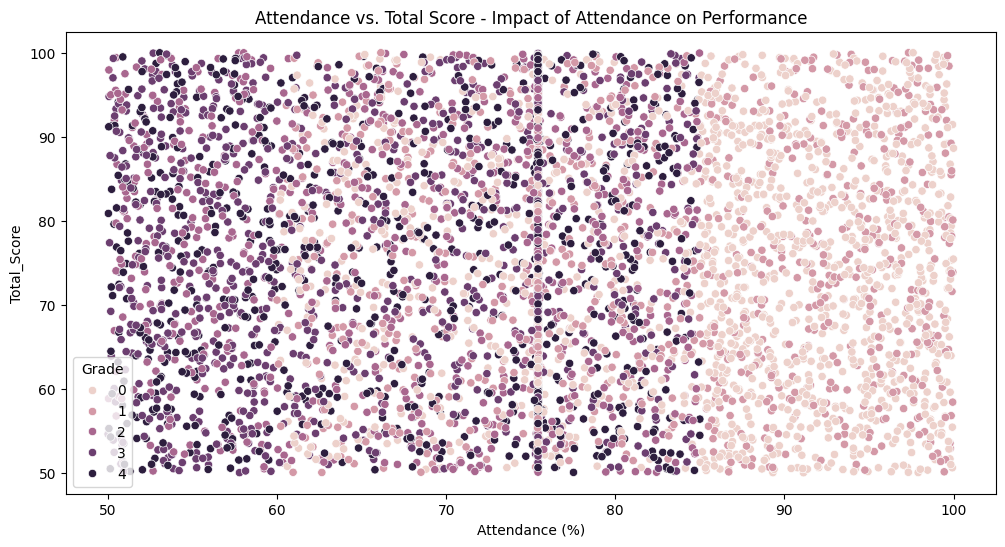

In [40]:
plt.figure(figsize=(12, 6))
sns.scatterplot(x=data_clean["Attendance (%)"], y=data_clean['Total_Score'], hue=data_clean['Grade'])
plt.title("Attendance vs. Total Score - Impact of Attendance on Performance")
plt.show()

show the  Relationship Between Study Time and Scores")


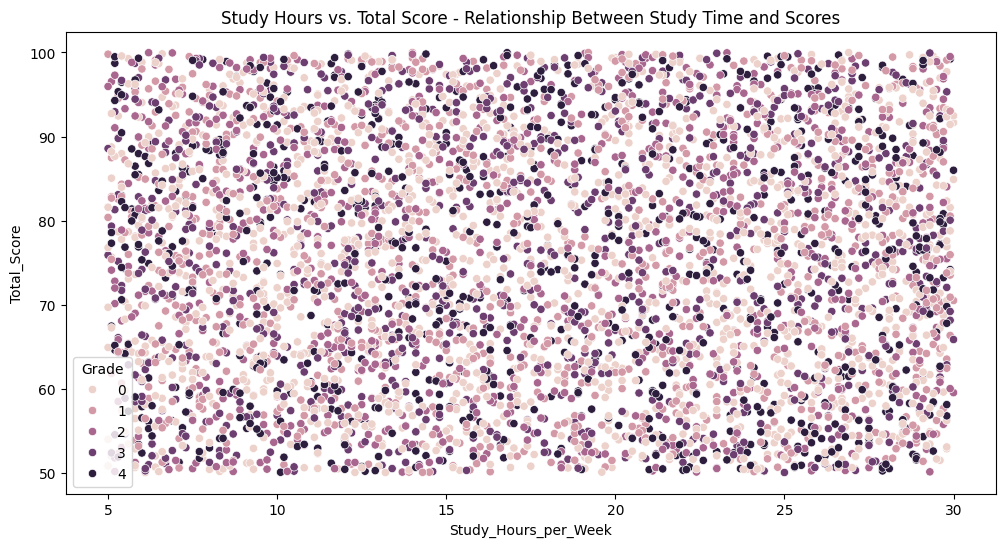

In [41]:
plt.figure(figsize=(12, 6))
sns.scatterplot(x=data_clean['Study_Hours_per_Week'], y=data_clean['Total_Score'], hue=data_clean['Grade'])
plt.title("Study Hours vs. Total Score - Relationship Between Study Time and Scores")
plt.show()


Lineplot
Uses line plots to show how stress levels and sleep hours change with age.
Helps see trends

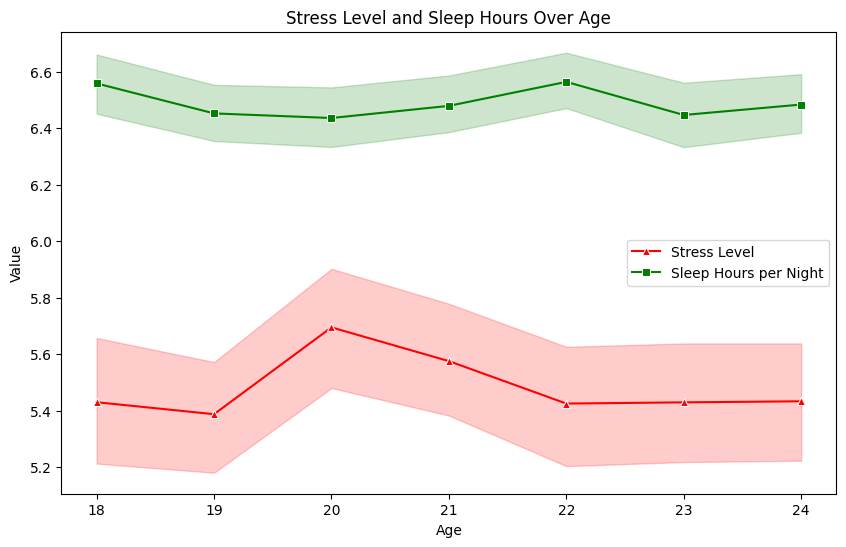

In [42]:
plt.figure(figsize=(10, 6))
sns.lineplot(x=data_clean['Age'], y=data_clean['Stress_Level (1-10)'], label="Stress Level", marker='^', color='r')
sns.lineplot(x=data_clean['Age'], y=data_clean['Sleep_Hours_per_Night'], label="Sleep Hours per Night", marker='s', color='g')
plt.xlabel("Age")
plt.ylabel("Value")
plt.title("Stress Level and Sleep Hours Over Age")
plt.legend()
plt.show()

 KDE (Kernel Density Estimation) plot to visualize the distribution of Final Scores and compare it across different features:
 

C:\Users\DELL\AppData\Local\Temp\ipykernel_6164\2274292654.py:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data_clean["Final_Score"], shade=True, color="blue")


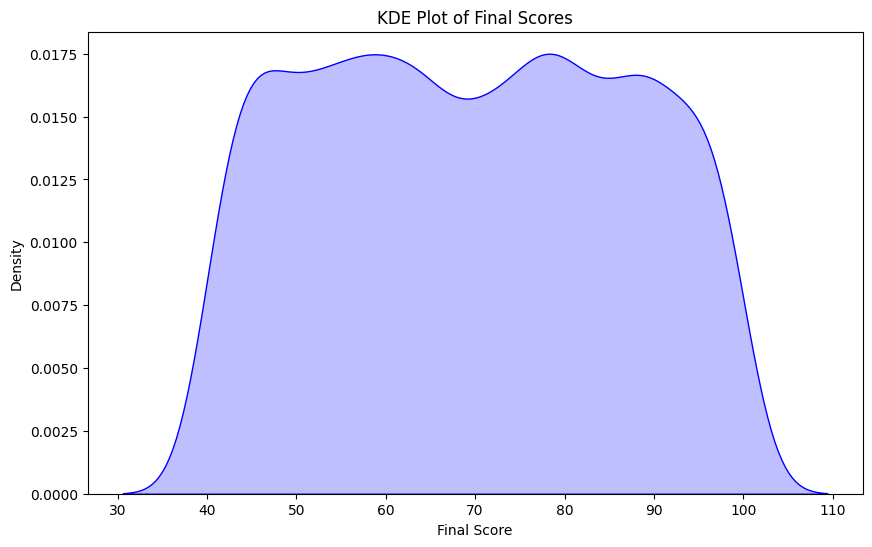

In [43]:
plt.figure(figsize=(10, 6))
sns.kdeplot(data_clean["Final_Score"], shade=True, color="blue")
plt.title("KDE Plot of Final Scores")
plt.xlabel("Final Score")
plt.ylabel("Density")
plt.show()

C:\Users\DELL\AppData\Local\Temp\ipykernel_6164\982950775.py:6: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title="Study Hours per Week")


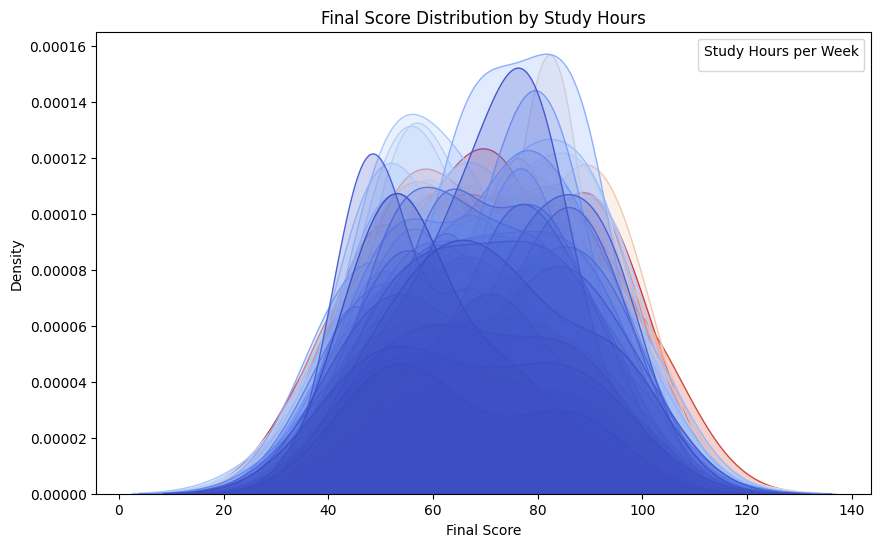

In [44]:
plt.figure(figsize=(10, 6))
sns.kdeplot(data=data_clean, x="Final_Score", hue="Study_Hours_per_Week", fill=True, palette="coolwarm")
plt.title("Final Score Distribution by Study Hours")
plt.xlabel("Final Score")
plt.ylabel("Density")
plt.legend(title="Study Hours per Week")
plt.show()

bar char to show the average final score by study hours category

C:\Users\DELL\AppData\Local\Temp\ipykernel_6164\3738883524.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=data_clean["Study_Category"], y=data_clean["Final_Score"], palette="viridis")


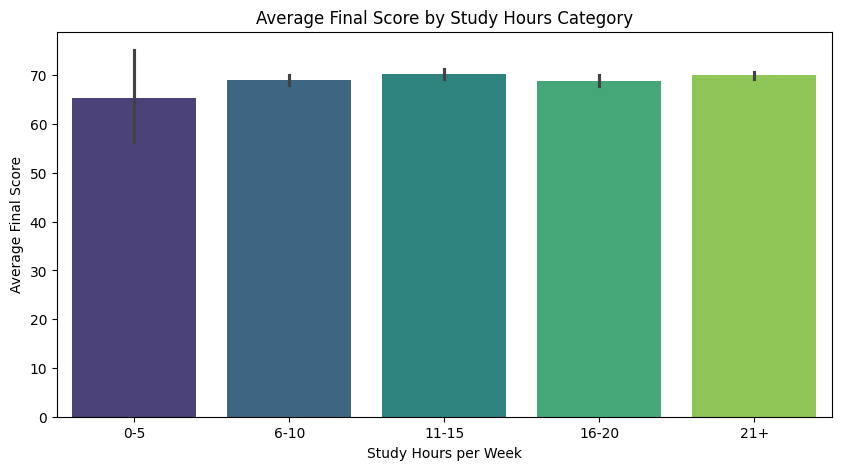

In [45]:
# Bar Chart - Average Scores by Study Hours Category**
data_clean["Study_Category"] = pd.cut(data_clean["Study_Hours_per_Week"], bins=[0, 5, 10, 15, 20, np.inf], labels=["0-5", "6-10", "11-15", "16-20", "21+"])
plt.figure(figsize=(10, 5))
sns.barplot(x=data_clean["Study_Category"], y=data_clean["Final_Score"], palette="viridis")
plt.title("Average Final Score by Study Hours Category")
plt.xlabel("Study Hours per Week")
plt.ylabel("Average Final Score")
plt.show()

the relation between stress_level and the Grade 

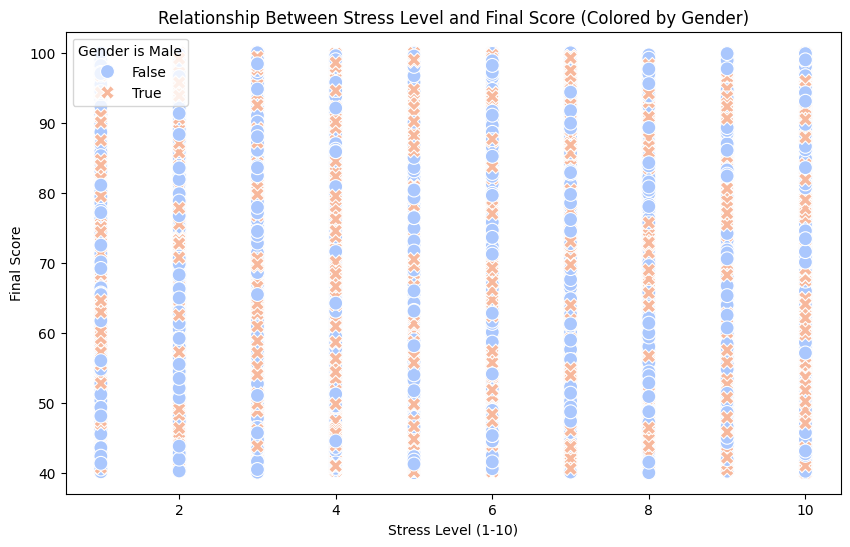

In [46]:

plt.figure(figsize=(10, 6))

# Scatter plot for Stress Level vs. Final Score with gender as hue
sns.scatterplot(x=data_clean["Stress_Level (1-10)"], y=data_clean["Final_Score"], hue=data_clean["Gender_Male"], style=data_clean["Gender_Male"], palette="coolwarm", s=100)

plt.xlabel("Stress Level (1-10)")
plt.ylabel("Final Score")
plt.title("Relationship Between Stress Level and Final Score (Colored by Gender)")
plt.legend(title="Gender is Male", loc="upper left")

plt.show()


 show Low attendance is strongly correlated with low grades

<Figure size 1000x600 with 0 Axes>

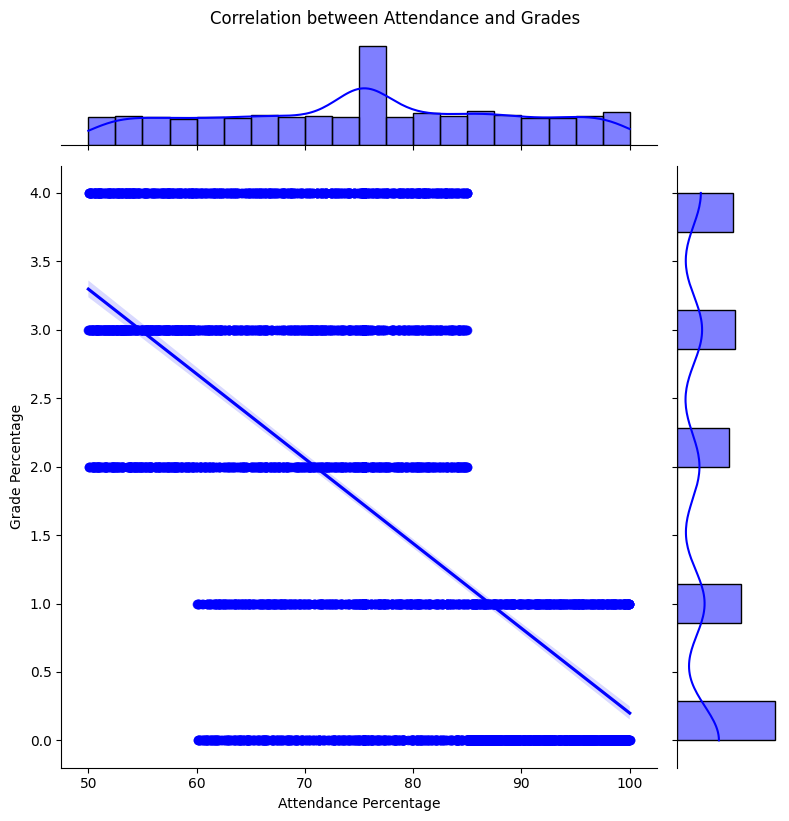

In [47]:
# Joint plot with regression line
plt.figure(figsize=(10, 6))
sns.jointplot(x='Attendance (%)', y='Grade', data=data_clean, kind='reg', height=8, ratio=5, color='b')

plt.xlabel("Attendance Percentage")
plt.ylabel("Grade Percentage")
plt.suptitle("Correlation between Attendance and Grades", y=1.02)
plt.show()

pairplot with features

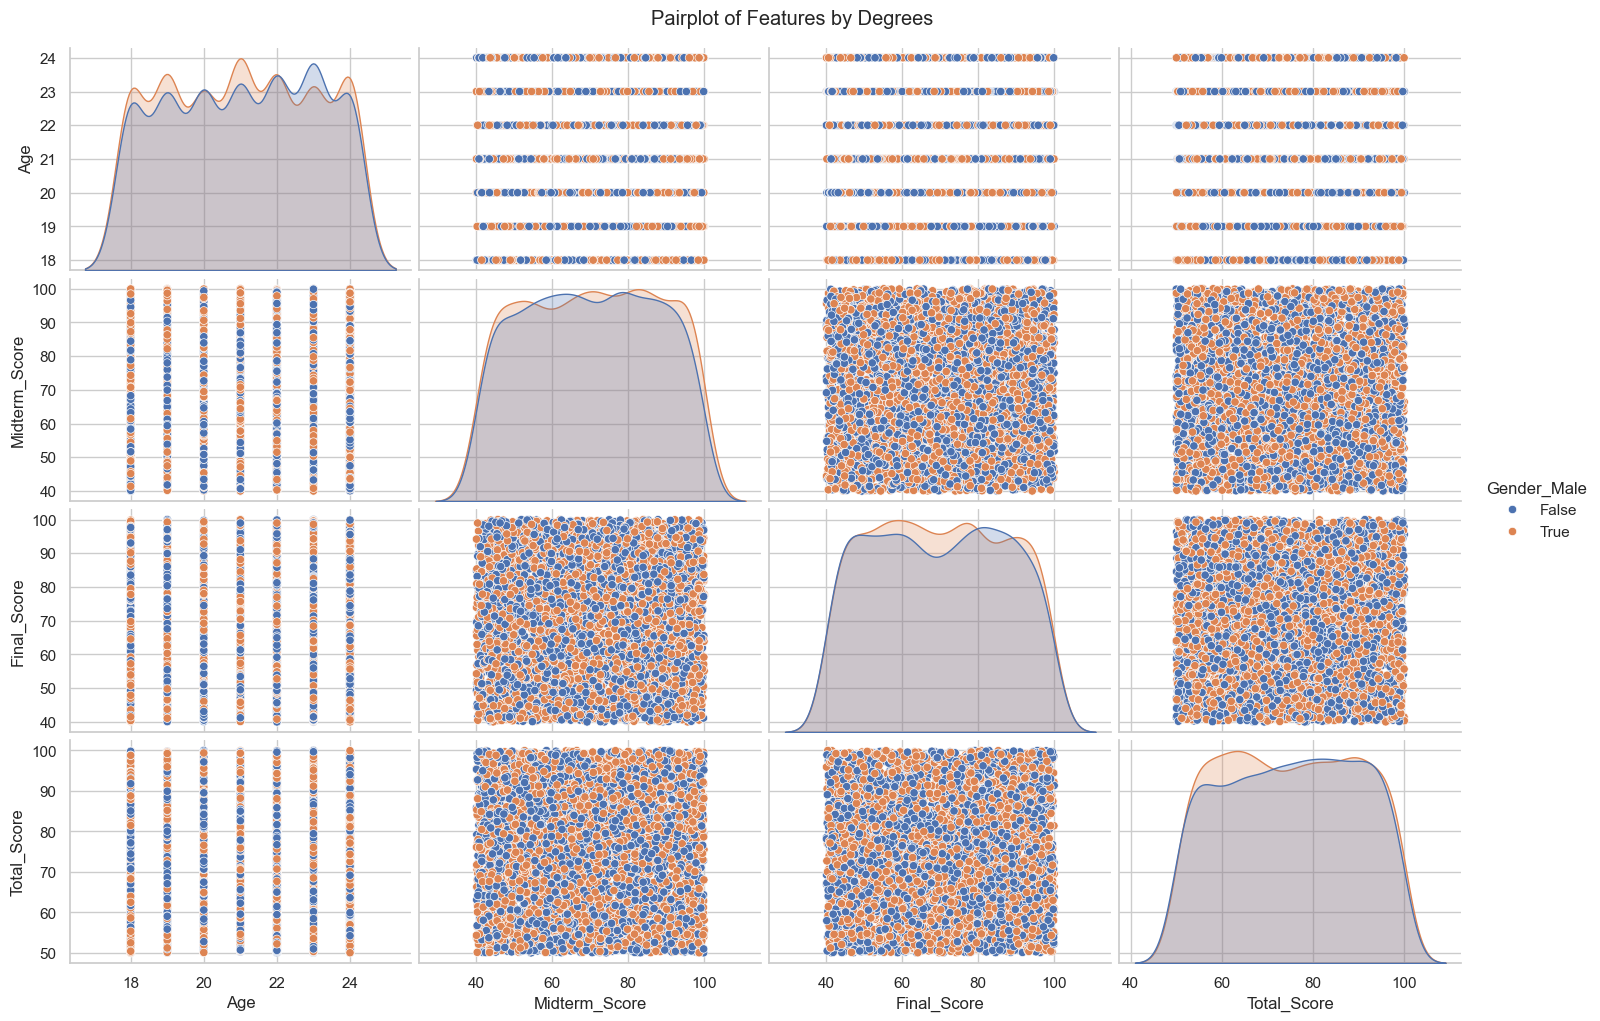

In [48]:
# Create a pairplot with enhanced aesthetics
sns.set(style="whitegrid")
pairplot = sns.pairplot(data_clean, hue='Gender_Male', vars=['Age', 'Midterm_Score', 'Final_Score', 'Total_Score'], height=2.5, aspect=1.5)
plt.suptitle('Pairplot of Features by Degrees', y=1.02)  
plt.show()

**Attendance vs. Final Score (Higher Attendance → Better Scores)**                                                                                     
📌 Hypothesis: Students with higher attendance have better final scores.

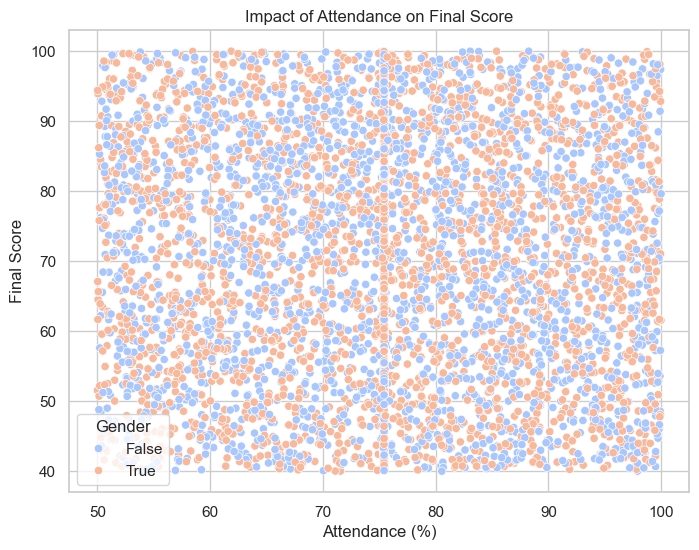

In [49]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x=data_clean["Attendance (%)"], y=data_clean["Final_Score"], hue=data_clean["Gender_Male"], palette="coolwarm")
plt.xlabel("Attendance (%)")
plt.ylabel("Final Score")
plt.title("Impact of Attendance on Final Score")
plt.legend(title="Gender")
plt.show()


**Study Hours vs. Final Score (More Study → Better Grades)**                                                                                     
📌 Hypothesis: More study hours per week lead to better grades.

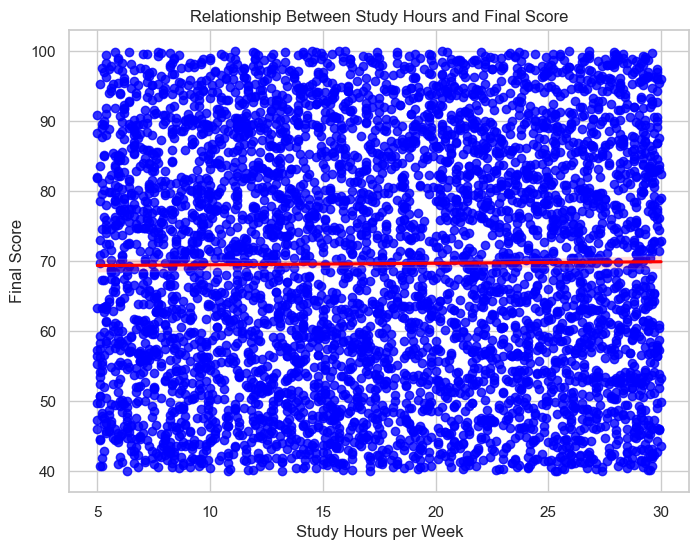

In [50]:
plt.figure(figsize=(8, 6))
sns.regplot(x=data_clean["Study_Hours_per_Week"], y=data_clean["Final_Score"], scatter_kws={"color": "blue"}, line_kws={"color": "red"})
plt.xlabel("Study Hours per Week")
plt.ylabel("Final Score")
plt.title("Relationship Between Study Hours and Final Score")
plt.show()


**Stress Level vs. Final Score (High Stress → Lower Scores)**                                                                                         

📌 Hypothesis: High-stress students tend to score lower.

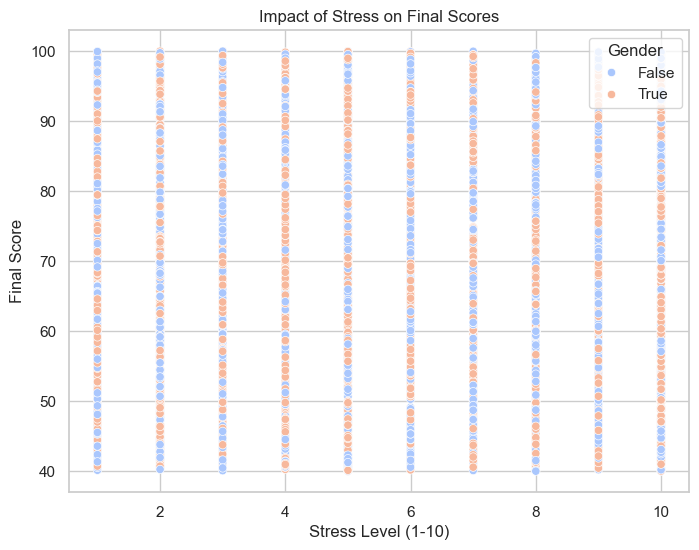

In [51]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x=data_clean["Stress_Level (1-10)"], y=data_clean["Final_Score"], hue=data_clean["Gender_Male"], palette="coolwarm")
plt.xlabel("Stress Level (1-10)")
plt.ylabel("Final Score")
plt.title("Impact of Stress on Final Scores")
plt.legend(title="Gender")
plt.show()


 **Poor Sleep & High Stress → Negative Impact on Grades**                                                                                            
📌 Hypothesis: Less sleep & high stress lead to lower scores.

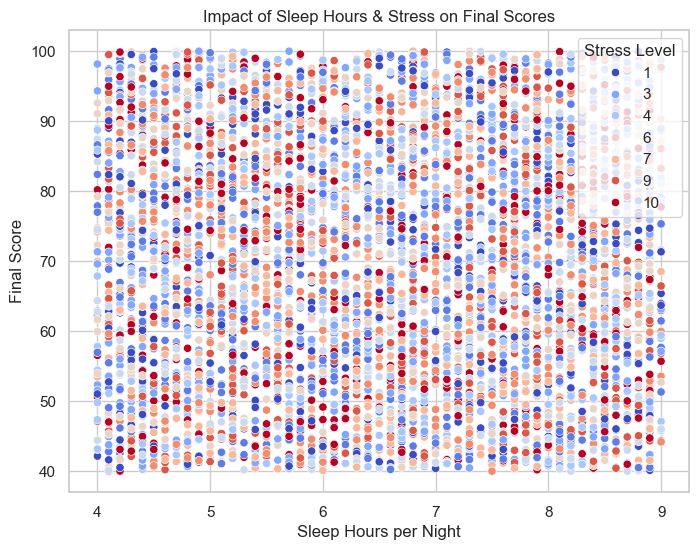

In [52]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x=data_clean["Sleep_Hours_per_Night"], y=data_clean["Final_Score"], hue=data_clean["Stress_Level (1-10)"], palette="coolwarm")
plt.xlabel("Sleep Hours per Night")
plt.ylabel("Final Score")
plt.title("Impact of Sleep Hours & Stress on Final Scores")
plt.legend(title="Stress Level")
plt.show()


# ML & DL Models Evaluation

 **Hypothesis Testing: Does High Stress Affect Scores?**                                                                                        
To statistically test whether high stress affects final scores, we use a T-test.

Group 1: Low-stress students (Stress_Level <= 5)  or <= median                                                                                                      
Group 2: High-stress students (Stress_Level > 5) or > median

In [53]:
# Calculate correlation
corr_stress_score = data_clean["Stress_Level (1-10)"].corr(data_clean["Final_Score"])
print(f"Correlation between Stress Level and Final Score: {corr_stress_score:.2f}")

# T-test: High vs. Low Stress Impact
low_stress = data_clean[data_clean["Stress_Level (1-10)"] <= 5]["Final_Score"]
high_stress = data_clean[data_clean["Stress_Level (1-10)"] > 5]["Final_Score"]

t_stat, p_value = ttest_ind(low_stress, high_stress, equal_var=False)
print(f"Tt-Statistic: {t_stat:.2f}")
print(f"Pp-Value: {p_value:.4f}")

if p_value < 0.05:
    print("Conclusion: High stress has a significant negative impact on final scores.")
else:
    print("Conclusion: No significant difference found between low and high-stress students.")


Correlation between Stress Level and Final Score: -0.00
Tt-Statistic: 0.48
Pp-Value: 0.6286
Conclusion: No significant difference found between low and high-stress students.


## **Models Evaluation**
**Steps for Building the Predictive Model**                                                                                                  
1️⃣ Select Features & Target Variable (Independent vs. Dependent)                                                                   
2️⃣ Handle Categorical Data (Encoding)                                                                                  
3️⃣ Split Data into Training & Testing Sets                                                                             
4️⃣ Train Machine Learning Models (Linear Regression, Decision Tree, Random Forest)                                                                   
5️⃣ Evaluate Model Performance (Accuracy, RMSE, R² Score)                                                                                    
6️⃣ Optimize the Model (Hyperparameter tuning if needed)                                                                

In [54]:
# Selecting relevant features
features = ["Attendance (%)", "Study_Hours_per_Week", "Stress_Level (1-10)", "Sleep_Hours_per_Night",
            "Assignments_Avg", "Quizzes_Avg", "Midterm_Score", "Projects_Score"]

target = "Final_Score" #  Target Variable: Final_Score

X = data_clean[features]
y = data_clean[target]


**Split Data into Training & Testing Sets**
We split the data 80% training, 20% testing for model evaluation.

In [55]:
# Splitting into train & test sets (80/20 split)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Training Set: {X_train.shape}, Testing Set: {X_test.shape}")


Training Set: (4000, 8), Testing Set: (1000, 8)


## **Train Machine Learning Models**
We’ll try three models:                                                                                                             
✅ Linear Regression (Baseline)                                                                                                             
✅ Decision Tree (Handles non-linearity)                                                  
✅ Random Forest (Ensemble model for better accuracy)

In [56]:
# Train Linear Regression Model
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

# Train Decision Tree Model
dt_model = DecisionTreeRegressor(random_state=42)
dt_model.fit(X_train, y_train)

# Train Random Forest Model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

print("Models trained successfully!")


Models trained successfully!


In [57]:
# Function to evaluate models
def evaluate_model(model, name):
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    print(f"{name} Model Performance:")
    print(f"📌 Mean Squared Error (MSE): {mse:.2f}")
    print(f"📌 R² Score: {r2:.2f}\n")

# Evaluate all models
evaluate_model(lr_model, "Linear Regression")
evaluate_model(dt_model, "Decision Tree")
evaluate_model(rf_model, "Random Forest")


Linear Regression Model Performance:
📌 Mean Squared Error (MSE): 292.52
📌 R² Score: -0.00

Decision Tree Model Performance:
📌 Mean Squared Error (MSE): 571.72
📌 R² Score: -0.96

Random Forest Model Performance:
📌 Mean Squared Error (MSE): 305.20
📌 R² Score: -0.05



Best Model: The model with the highest R² score and lowest MSE


##  Steps for Hyperparameter Tuning


### Compare Performance of All Models
We'll compare Linear Regression, Decision Tree, Default Random Forest, and Optimized Random Forest based on:

In [58]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV
import numpy as np

# Define parameter grid (wider ranges for better random selection)
param_dist = {
    "n_estimators": np.arange(50, 201, 50),  # Random choice from 50, 100, 150, 200
    "max_depth": [5, 10, 20, None],  # Fewer choices
    "min_samples_split": [2, 5, 10],
    "min_samples_leaf": [1, 2, 4]
}

# Initialize model
rf = RandomForestRegressor(random_state=42)

# Perform RandomizedSearchCV (only searches 10 random combinations instead of all)
random_search = RandomizedSearchCV(estimator=rf, param_distributions=param_dist, 
                                   n_iter=10, cv=3, n_jobs=-1, scoring="r2", verbose=1, random_state=42)

random_search.fit(X_train, y_train)

# Get best parameters
best_params = random_search.best_params_
print(f"🔍 Best Hyperparameters: {best_params}")


Fitting 3 folds for each of 10 candidates, totalling 30 fits
🔍 Best Hyperparameters: {'n_estimators': np.int64(200), 'min_samples_split': 5, 'min_samples_leaf': 2, 'max_depth': 5}


### Visualize Predictions vs. Actual Values
We'll plot Actual vs. Predicted Scores for all models to see how close they are.

In [59]:
# Train optimized Random Forest
best_rf_model = RandomForestRegressor(**best_params, random_state=42)
best_rf_model.fit(X_train, y_train)

print("✅ Optimized Random Forest Model Trained!")

# Predict on test data
y_pred_optimized = best_rf_model.predict(X_test)

# Calculate evaluation metrics
mse_optimized = mean_squared_error(y_test, y_pred_optimized)
r2_optimized = r2_score(y_test, y_pred_optimized)

print(f"📌 Optimized Random Forest Performance:")
print(f"✅ Mean Squared Error (MSE): {mse_optimized:.2f}")
print(f"✅ R² Score: {r2_optimized:.2f}")


✅ Optimized Random Forest Model Trained!
📌 Optimized Random Forest Performance:
✅ Mean Squared Error (MSE): 293.00
✅ R² Score: -0.00


### Compare Performance of All Models
We'll compare Linear Regression, Decision Tree, Default Random Forest, and Optimized Random Forest based on:                    
✔ Mean Squared Error (MSE)                                                                                                                 
✔ R² Score

In [60]:
# Function to evaluate models
def evaluate_model(model, name):
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    print(f"{name} Model Performance:")
    print(f"📌 Mean Squared Error (MSE): {mse:.2f}")
    print(f"📌 R² Score: {r2:.2f}\n")
    return mse, r2

# Evaluate all models
mse_lr, r2_lr = evaluate_model(lr_model, "Linear Regression")
mse_dt, r2_dt = evaluate_model(dt_model, "Decision Tree")
mse_rf, r2_rf = evaluate_model(rf_model, "Default Random Forest")
mse_rf_opt, r2_rf_opt = evaluate_model(best_rf_model, "Optimized Random Forest")

# Create a comparison DataFrame
import pandas as pd

results = pd.DataFrame({
    "Model": ["Linear Regression", "Decision Tree", "Default Random Forest", "Optimized Random Forest"],
    "MSE": [mse_lr, mse_dt, mse_rf, mse_rf_opt],
    "R² Score": [r2_lr, r2_dt, r2_rf, r2_rf_opt]
})

# Display results
print(results)


Linear Regression Model Performance:
📌 Mean Squared Error (MSE): 292.52
📌 R² Score: -0.00

Decision Tree Model Performance:
📌 Mean Squared Error (MSE): 571.72
📌 R² Score: -0.96

Default Random Forest Model Performance:
📌 Mean Squared Error (MSE): 305.20
📌 R² Score: -0.05

Optimized Random Forest Model Performance:
📌 Mean Squared Error (MSE): 293.00
📌 R² Score: -0.00

                     Model         MSE  R² Score
0        Linear Regression  292.519116 -0.003076
1            Decision Tree  571.715520 -0.960467
2    Default Random Forest  305.204823 -0.046576
3  Optimized Random Forest  292.996140 -0.004712


### Visualize Predictions vs. Actual Values
We'll plot Actual vs. Predicted Scores for all models to see how close they are.

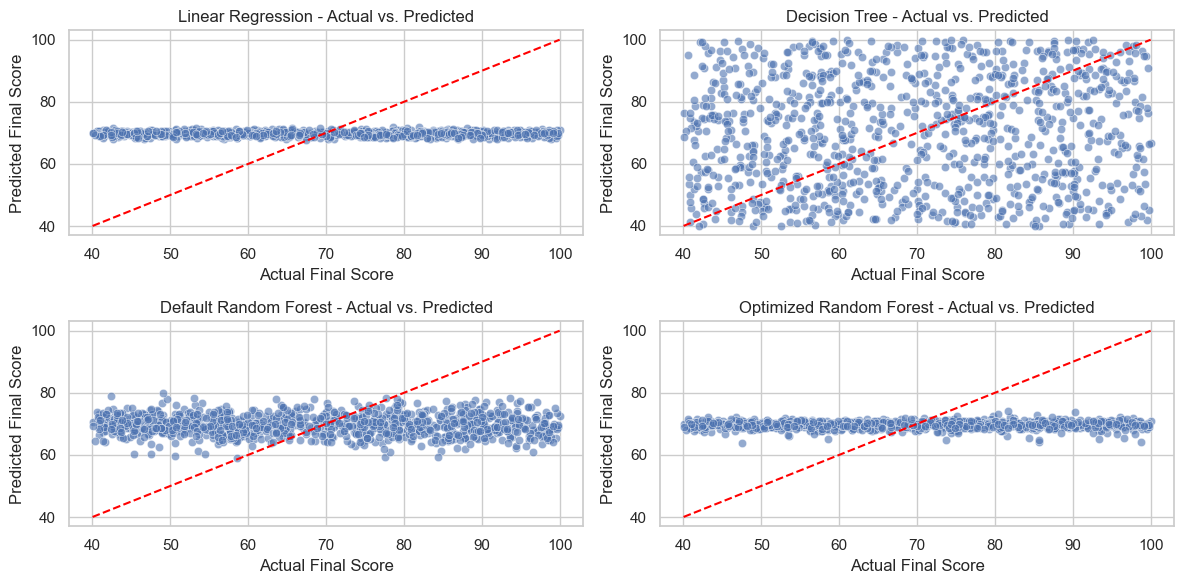

In [61]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot Predictions vs. Actual values
plt.figure(figsize=(12, 6))

# Models and predictions
models = {
    "Linear Regression": lr_model,
    "Decision Tree": dt_model,
    "Default Random Forest": rf_model,
    "Optimized Random Forest": best_rf_model
}

for i, (name, model) in enumerate(models.items(), 1):
    plt.subplot(2, 2, i)
    y_pred = model.predict(X_test)
    sns.scatterplot(x=y_test, y=y_pred, alpha=0.6)
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color="red", linestyle="--")
    plt.title(f"{name} - Actual vs. Predicted")
    plt.xlabel("Actual Final Score")
    plt.ylabel("Predicted Final Score")

plt.tight_layout()
plt.show()


### Feature Importance (Which Features Matter Most?)
We'll use the optimized Random Forest model to find which features have the biggest impact on the Final Score.

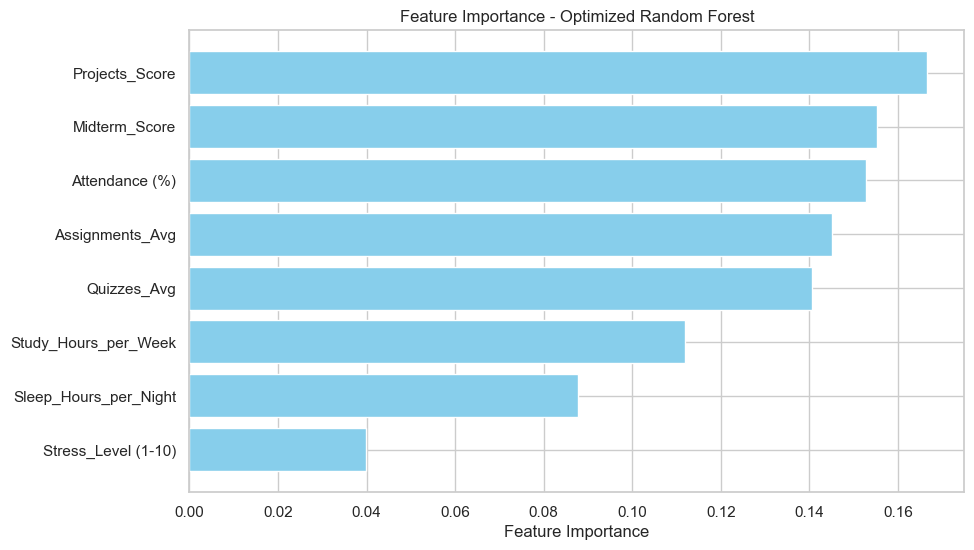

In [62]:
# Feature Importance Plot
import numpy as np

# Get feature importances
feature_importance = best_rf_model.feature_importances_
sorted_idx = np.argsort(feature_importance)

plt.figure(figsize=(10, 6))
plt.barh(np.array(features)[sorted_idx], feature_importance[sorted_idx], color="skyblue")
plt.xlabel("Feature Importance")
plt.title("Feature Importance - Optimized Random Forest")
plt.show()


# **📌 Summary of Student Dataset Analysis & Modeling**  

We conducted a comprehensive **data analysis, preprocessing, and predictive modeling** using the student dataset to uncover key insights affecting student performance. Below is a structured summary of the steps taken:  

---

### **🔍 1. Data Cleaning & Preprocessing**  
✔ **Handled Missing Values** – Imputed missing data using mean/median for numerical columns and mode for categorical columns.  
✔ **Removed Duplicates** – Ensured dataset integrity by dropping duplicate records.  
✔ **Data Type Conversion** – Converted categorical variables to appropriate formats (e.g., numerical encoding).  
✔ **Encoding Categorical Features** – Applied Label Encoding and One-Hot Encoding to convert categorical variables such as:
Gender, Parent Education Level, Family Income Level → Label Encoding                                                                         
Department, Extracurricular Activities, Internet Access → One-Hot Encoding                                                                                  
✔ **Remove Unccessary columns** – the columns (first_name , last_name , Email , familly_Income_level) not usefual to model .  
✔ **Outlier Detection & Treatment** – Identified outliers using box plots and IQR, then addressed them using capping methods or removal.  


---

### **📊 2. Exploratory Data Analysis (EDA)**  
✔ **Visualized Distributions** – Used histograms,pie chaert,line Plot,scatterplot ,Bar plot , KDE plots, and box plots to understand the distribution of numerical variables.  
✔ **Correlation Analysis** – Generated a heatmap to assess relationships between features (e.g., attendance, study hours, and final scores).  
✔ **Impact of Factors**:  
   - Higher **attendance** positively correlated with **higher final scores**.  
   - Increased **study hours** resulted in **better performance**.  
   - High **stress levels** negatively impacted grades, especially when combined with poor sleep.  
✔ **Comparison by Gender** – Analyzed differences in performance metrics across gender groups using bar and pie charts.  


---

### **📈 3. Predictive Modeling**  
✔ **Trained Multiple Models** – Implemented **Linear Regression, Decision Tree, and Random Forest** for predicting student performance.  
✔ **Hyperparameter Tuning** – Optimized **Random Forest Regressor** using **RandomizedSearchCV** for better efficiency.  
✔ **Model Evaluation** – Compared models based on **Mean Squared Error (MSE)** and **R² Score**, selecting the best-performing model.  
✔ **Feature Importance Analysis** – Identified key factors influencing student scores using Random Forest's feature importance.  

---

### **📌 Key Findings & Insights**  
📍 **Attendance & Study Hours Matter** – Students with **higher attendance and more study hours** consistently performed better.  
📍 **Stress & Sleep Impact Performance** – High stress combined with low sleep **led to lower scores**.  
📍 **Parent Education & Internet Access** – Students with **higher parent education levels** and **internet access at home** showed better academic performance.  

---
### **📊 Conclusion & Future Work**
The analysis revealed significant factors influencing student performance, including attendance, study hours, stress levels, and parental
education. These insights can inform targeted interventions to improve student outcomes. Future work could involve exploring additional factors
  to improve student performance, such as incorporating technology-based assessments, creating engaging learning environments, and promoting academic support.
  

---

<div style="text-align: center;">
  <p>Thank you for your time and efforts!</p>
  <h3>By: Youssef Bassiony Abdlah</h3>
  <div style="display: inline-block;">
    <a href="yossf.abdla311@gmail.com" title="Redirect to e-mail">
      <img src="objects/Pic/icons8-gmail-logo-94.png"  alt="e-mail" style="width: 50px; height: 50px; margin: 0 10px;">
    </a>
    <a href="https://wa.me/+201001725166/" title="Redirect to What'sApp">
      <img src="objects/Pic/icons8-whatsapp-48.png" alt="What'sApp" style="width: 50px; height: 50px; margin: 0 10px;">
    </a>
    <a href="https://www.linkedin.com/in/youssef-bassiony/" title="Redirect to LinkedIn">
      <img src="objects/Pic/icons8-linkedin-48.png" alt="LinkedIn" style="width: 50px; height: 50px; margin: 0 10px;">
    </a>
  </div>
</div>
